#### Crypto Coin Price Prediction Using Long-Short-Term-Model Algorithm in Neural Networks 
 Developers
+ 214210050 Furkan Demircan
+ 214210056 Eray Elagoz 
---------------------------------------------------------------------------

##### Objective
It aims to leverage machine learning & Deep Learning techniques to develop an accurate and reliable model for predicting and forecasting Bitcoin prices. By utilizing historical data and relevant features, the model provided insights into the potential future trends of Bitcoin, assisting investors, traders, and researchers in making informed decisions in the cryptocurrency market.

##### Libraries

In [ ]:
# Data manipulation and analysis
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import yfinance as yf # for coin data

# Main libraries
import datetime as dt # for date and time operations

# Machine learning
from sklearn.preprocessing import MinMaxScaler # for normalization
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error, mean_absolute_percentage_error # for model evaluation
from sklearn.metrics import f1_score, accuracy_score, classification_report, recall_score, precision_score # for model evaluation

# Deep learning
import tensorflow as tf # For neural networks
from tensorflow.keras.models import Sequential # For building the neural network
from tensorflow.keras.layers import Dense, Dropout, LSTM # For building neural networks

##### Fetching the Bitcoin Price Data

In [ ]:
# Fetch Bitcoin data
df = yf.download("ETH-USD", start="2015-01-01", end="2024-11-30")

# Display the first few rows of the data
df.head()

# Plot the closing price to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label="Closing Price", color='green')
plt.title("Ethereum Closing Price (2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

##### Data Infos

In [ ]:
print("=============================================")
print("Data types of the columns in the data frame:", df.dtypes) # Data types of the columns
print("=============================================")
print("Shape of the data frame:", df.shape) # Shape of the data frame
print("=============================================")
print("Lenght of the data:", len(df)) # Length of the data
print("=============================================")
print("Checking for missing values in the data:\n", df.isnull().sum()) # Checking for missing values
print("=============================================")
df.describe() # Summary statistics of the data

##### Data PreProcessing

In [ ]:
# Use only the 'Close' column for prediction
data = df[['Close']]

# Scale data between 0 and 1 for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

# Define prediction window size
prediction_days = 30 # Use the last 30 days to predict the next day

# Create training data
x_train, y_train = [], []

# Loop through the data
for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i - prediction_days:i, 0])
    y_train.append(scaled_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape data for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

##### Creating the Neural Network with LSTM

In [269]:
# Initialize the LSTM model
model = Sequential() 

# Add layers
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3)) # Prevent overfitting
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100))
model.add(Dropout(0.3))
model.add(Dense(units=1)) # Final output layer

# Compile the model     
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0192
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0037
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0032
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0029
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0023
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0030
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0022
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0024
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0020
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0017
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0016
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0017
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0019
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0015
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0017
Epoch 16/50
80/

##### Model Data

In [270]:
model.summary() # Display the model summary

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_45 (LSTM)                  │ (None, 30, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_46 (LSTM)                  │ (None, 30, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 30, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,105 (2.31 MB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 403,404 (1.54 MB)

##### Test Data

In [271]:
# Fetch the last 30 days of data for prediction
future_days = 30  # Number of days to predict

# Prepare test data
test_data = df[-(prediction_days + future_days):] # Include a small recent dataset
test_scaled = scaler.transform(test_data['Close'].values.reshape(-1, 1))

# Create x_test and y_test
x_test = []
y_test = test_scaled[prediction_days:] # Actual prices for evaluation

# Create x_test
for i in range(prediction_days, len(test_scaled)):
    x_test.append(test_scaled[i - prediction_days:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

##### Prediction Ethereum Price

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


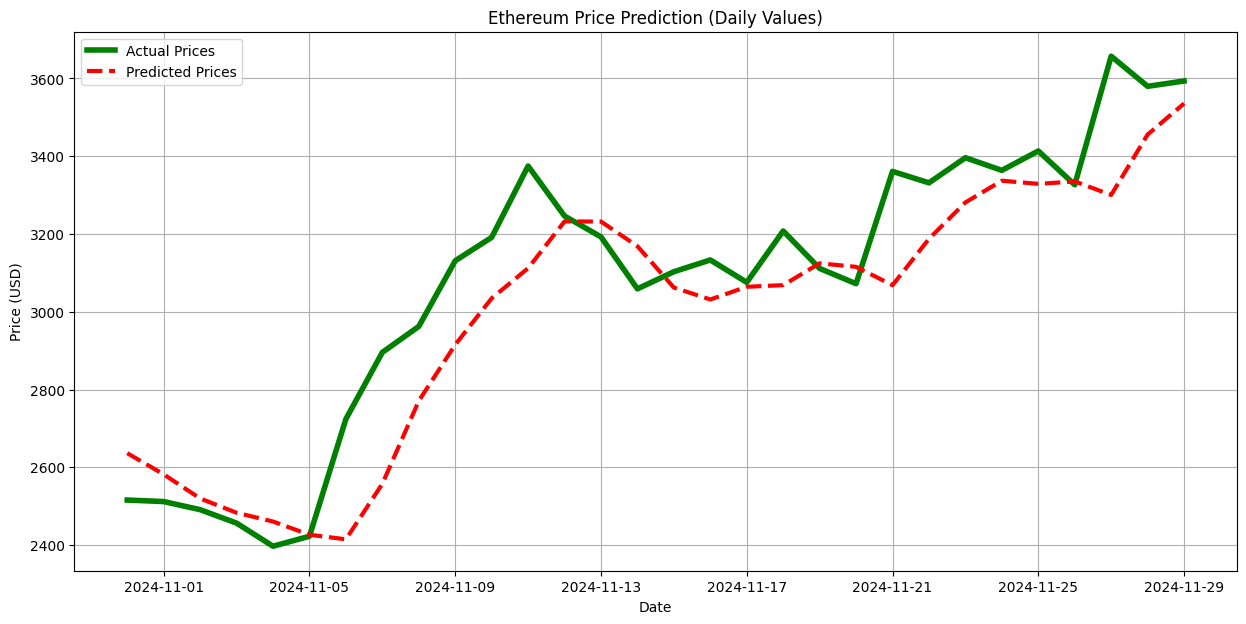

In [272]:
# Predict Ethereum prices
predicted_scaled = model.predict(x_test)

# Inverse scale predictions to get actual price
predicted_prices = scaler.inverse_transform(predicted_scaled)

# Inverse scale y_test for comparison
actual_prices = scaler.inverse_transform(y_test)

# Generate a date range for x-axis
dates = df.index[-len(actual_prices):]

# Plot actual vs predicted prices with dates
plt.figure(figsize=(15, 7))
plt.plot(dates, actual_prices, label="Actual Prices", color="green", linewidth=4)
plt.plot(dates, predicted_prices, label="Predicted Prices", color="red", linestyle="--", linewidth=3)
plt.title("Ethereum Price Prediction (Daily Values)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)

##### Evaulating the Model
F1 score and accuracy are not suitable methods for regression models.For regression models, metrics like MSE, MAPE, and RMSE provide better insights.

In [273]:
# Convert prices to labels (1 if price goes up, 0 if price goes down)
actual_labels = np.where(actual_prices[1:] > actual_prices[:-1], 1, 0)
predicted_labels = np.where(predicted_prices[1:] > actual_prices[:-1], 1, 0)

# Calculate accuracy and F1-score
f1 = f1_score(actual_labels, predicted_labels)
accuracy = accuracy_score(actual_labels, predicted_labels)
recall_score = recall_score(actual_labels, predicted_labels)
precision_score = precision_score(actual_labels, predicted_labels)

# Print the classification report
print(f"=============================================")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1-Score: {f1:.2f}")
print(f"Recall: {recall_score:.2f}")
print(f"Precision: {precision_score:.2f}")
# Detailed classification report
print(f"=============================================")
print(classification_report(actual_labels, predicted_labels))
print(f"=============================================")

Accuracy: 41.38%
F1-Score: 0.19
Recall: 0.13
Precision: 0.33
              precision    recall  f1-score   support

           0       0.43      0.71      0.54        14
           1       0.33      0.13      0.19        15

    accuracy                           0.41        29
   macro avg       0.38      0.42      0.37        29
weighted avg       0.38      0.41      0.36        29



In [274]:
# Calculate regression metrics
mse = mean_squared_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = root_mean_squared_error(actual_prices, predicted_prices)
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100

# Print the error metrics
print(f"=============================================")
print(f"Mean Squared Error: {mse:.2f}") # Mean Squared Error
print(f"Root Mean Squared Error: {rmse:.2f}") # Root Mean Squared Error
print(f"=============================================")
print(f"Mean Absolute Error: {mae:.2f} $ Gunluk Sapma Miktari") # Mean Absolute Error
print(f"=============================================")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%") # Mean Absolute Percentage Error
print(f"! A MAPE below 10-20% is generally considered good for financial predictions.")
print(f"=============================================")

Mean Squared Error: 24428.43
Root Mean Squared Error: 156.30
Mean Absolute Error: 117.02 $ Gunluk Sapma Miktari
Mean Absolute Percentage Error (MAPE): 3.76%
! A MAPE below 10-20% is generally considered good for financial predictions.


##### Comparing the Train and Test Scores

In [275]:
# Train and test losses
train_loss = history.history['loss'][-1]  # Final loss after training
test_loss = model.evaluate(x_test, y_test) # Loss on test data

# Print the final train and test losses
print(f"=============================================")
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")
print(f"=============================================")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - loss: 0.0011
Train Loss: 0.0009191889548674226
Test Loss: 0.0010929011041298509


In [276]:
from tensorflow.keras.models import Sequential # Model oluşturmak için
from tensorflow.keras.layers import LSTM, Dense, Dropout # LSTM ve katmanlar için

# Modeli başlat
model = Sequential()  # Sıralı model

# 1. LSTM katmanı (return_sequences=True ile ardışık çıktı sağlanır)
model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))  # 60 gün veri, 1 özellik
model.add(Dropout(0.2))  # %20 dropout

# 2. LSTM katmanı
model.add(LSTM(units=50, return_sequences=True)) # Ardışık çıktı
model.add(Dropout(0.2)) # %20 dropout

# 3. LSTM katmanı (son LSTM katmanı olduğu için return_sequences=False)
model.add(LSTM(units=50)) # Ardışık çıktı yok
model.add(Dropout(0.2)) # %20 dropout

# Çıkış katmanı (1 tahmin edilen değer)
model.add(Dense(units=1)) # 1 nöron

# Modelin derlenmesi
model.compile(optimizer='adam', loss='mean_squared_error')

# Model özeti
model.summary() # Model özeti


c:\Users\ErenElagz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)